In [28]:
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from kernal import linear, polynomial, rbf

# Ej 1

### a) Construct a set 'TP3-1' of linearly separable examples at < 2 (e.g., randomly generate points in [0, 5]x[0, 5] such that they belong to two linearly separable classes 1 and -1). Use a simple step perceptron to separate the ensemble linearly. Is the separation hyperplane optimal? Justify the answer.



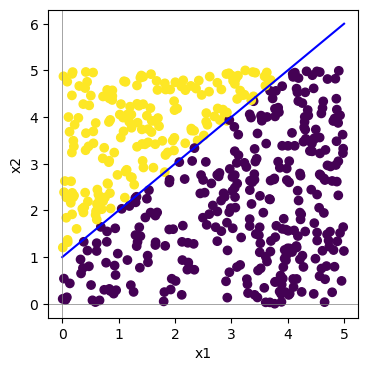

In [29]:
np.random.seed(0) # Apparently this sets the random to be not so random anymore

# This is for the spliting line function
n_items = 500
b0 = -3
b1 = -3
b2 = 3

# Create the data
x1 = [random.uniform(0, 5) for i in range(n_items)]
x2 = [random.uniform(0, 5) for i in range(n_items)]

x1_for_line = np.linspace(0, 5, 100)
x2_for_line = (-b0 - b1 * x1_for_line) / b2

# Fit the data in the dataframe and make the class column (1 if above the line, 0 otherwise
data = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'Class': [1 if (b0 + b1 * x1[i] + b2 * x2[i]) > 0 else 0 for i in range(n_items)]
})

TP3_1 = data

# Create a train test split
train, test = train_test_split(data, test_size=0.25, random_state=38)

def ploting(data):
    plt.figure(figsize=(4, 4))
    plt.plot(x1_for_line, x2_for_line, label=f'{b0} + {b1}x1 + {b2}x2 = 0', color='blue')
    plt.scatter(data['x1'], data['x2'], label='Data', c=data['Class'], marker='o')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.axhline(0, color='grey', linewidth=0.5)
    plt.axvline(0, color='grey', linewidth=0.5)
    plt.show()

ploting(data)


Data in [0,5]x[0,5] is created. Green is above the line, red below. The blue line is the seperator as defined by b0 = -2, b1 = -3, b2 = 3 for b0 + b1x1 + b2x2

In [30]:
# perceptron
def perceptron_train(X, y, learning_rate=0.1, n_epochs=1):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    
    for _ in range(n_epochs):
        for i in range(n_samples):
            prediction = np.dot(X[i], weights) + bias
            if prediction > 0:
                y_pred = 1
            else:
                y_pred = 0
            if y_pred != y[i]:
                weights += learning_rate * (y[i] - y_pred) * X[i]
                bias += learning_rate * (y[i] - y_pred)
    
    return weights, bias

In [31]:
# Just do everythin into a def so that we can change stuff to show multiple plots

def perform_perceptron(epochs=100):
    X_train = train[['x1', 'x2']].values
    y_train = train['Class'].values

    X_test = test[['x1', 'x2']].values
    y_test = test['Class'].values

    weights, bias = perceptron_train(X_train, y_train, learning_rate=0.1, n_epochs=epochs)

    plt.figure(figsize=(6, 5))
    # plt.plot(x1_for_line, x2_for_line, label=f'{b0} + {b1}x1 + {b2}x2 = 0', color='blue')
    plt.scatter(data['x1'], data['x2'], label='Data', c=data['Class'], marker='o')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.axhline(0, color='grey', linewidth=0.5)
    plt.axvline(0, color='grey', linewidth=0.5)

    # Make predictions on the test set (X_test)
    y_pred = np.dot(X_test, weights) + bias
    y_pred = (y_pred > 0).astype(int)  # Convert to 1 if prediction is > 0, else 0

    # Calculate the classification report
    report = classification_report(y_test, y_pred)

    # Print the classification report
    print(report)

    # For the boundary line
    x_boundary = np.linspace(0, 5, 100)
    y_boundary = (-weights[0] * x_boundary - bias) / weights[1]
    plt.plot(x_boundary, y_boundary, label='Perceptron Decision Boundary', color='green', linestyle='--')

    plt.legend()
    plt.show()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        35

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



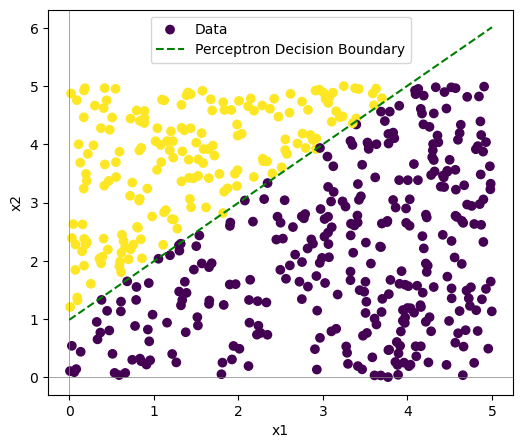

In [32]:
perform_perceptron(epochs=100)


### b) Obtain the optimal hyperplane from the hyperplane obtained with the perceptron simple.

### c) Construct the set 'TP3-2' in an analogous way to how you constructed the set 'TP3-1' but this time include some examples that are misclassified near the separating hyperplane. Use a simple perceptron to separate the two classes. Comment on the results.

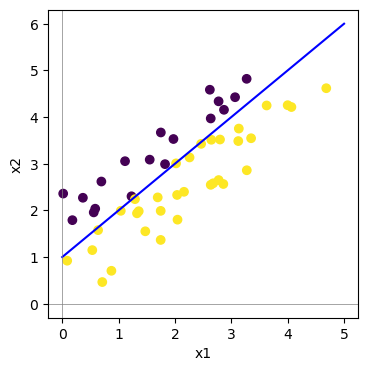

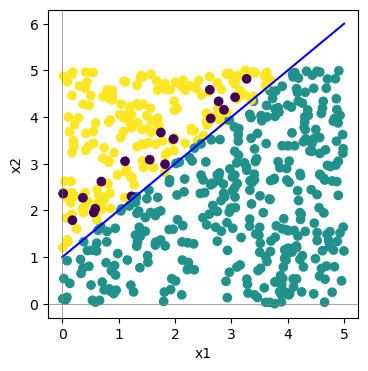

In [47]:
TP3_2 = TP3_1.copy()

n_additional_points = 100
additional_data = []

# Generate additional data points near the separating hyperplane
for _ in range(n_additional_points):
    x1_new = random.uniform(0, 5)
    x2_new = random.uniform(0, 5)
    
    # Calculate the distance from the point to the separating hyperplane
    distance = abs(b0 + b1 * x1_new + b2 * x2_new) / (b1 ** 2 + b2 ** 2) ** 0.5
    
    # Check if the distance is less than 1 (within 1 unit from the hyperplane)
    if distance <= 1:
        # Determine the class based on the hyperplane
        class_label = 1 if (b0 + b1 * x1_new + b2 * x2_new) > 0 else 0
        
        # Append the new data point to the list as a dictionary
        additional_data.append({'x1': x1_new, 'x2': x2_new, 'Class': -1 * class_label}) # for some reason it does it oposite so -1 to fix

# Convert the list of dictionaries into a DataFrame and concat to TP3_1
additional_df = pd.DataFrame(additional_data)
TP3_2 = pd.concat([TP3_2, additional_df], ignore_index=True)

ploting(additional_df)
ploting(TP3_2)

### d) Use SVM to classify both set 'TP3-1' and set 'TP3-2'. Compare the results with those obtained in points a) and c).
